# Challenge 1 - Tic Tac Toe

In this lab you will perform deep learning analysis on a dataset of playing [Tic Tac Toe](https://en.wikipedia.org/wiki/Tic-tac-toe).

There are 9 grids in Tic Tac Toe that are coded as the following picture shows:

![Tic Tac Toe Grids](tttboard.jpg)

In the first 9 columns of the dataset you can find which marks (`x` or `o`) exist in the grids. If there is no mark in a certain grid, it is labeled as `b`. The last column is `class` which tells you whether Player X (who always moves first in Tic Tac Toe) wins in this configuration. Note that when `class` has the value `False`, it means either Player O wins the game or it ends up as a draw.

Follow the steps suggested below to conduct a neural network analysis using Tensorflow and Keras. You will build a deep learning model to predict whether Player X wins the game or not.

## Step 1: Data Engineering

This dataset is almost in the ready-to-use state so you do not need to worry about missing values and so on. Still, some simple data engineering is needed.

1. Read `tic-tac-toe.csv` into a dataframe.
1. Inspect the dataset. Determine if the dataset is reliable by eyeballing the data.
1. Convert the categorical values to numeric in all columns.
1. Separate the inputs and output.
1. Normalize the input data.

In [1]:
# your code here

import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Read the data
df = pd.read_csv('tic-tac-toe.csv')

# Inspect the data
print("Dataset shape:", df.shape)
print("\nFirst few rows:")
print(df.head())
print("\nData info:")
print(df.info())

# Convert categorical values to numeric using LabelEncoder
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

# Separate inputs (X) and output (y)
X = df.drop('class', axis=1)
y = df['class']

# Normalize input data using MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

print("\nAfter preprocessing - First few rows of scaled input data:")
print(pd.DataFrame(X_scaled, columns=X.columns).head())
print("\nFirst few values of encoded output:")
print(y.head())


Dataset shape: (958, 10)

First few rows:
  TL TM TR ML MM MR BL BM BR  class
0  x  x  x  x  o  o  x  o  o   True
1  x  x  x  x  o  o  o  x  o   True
2  x  x  x  x  o  o  o  o  x   True
3  x  x  x  x  o  o  o  b  b   True
4  x  x  x  x  o  o  b  o  b   True

Data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   TL      958 non-null    object
 1   TM      958 non-null    object
 2   TR      958 non-null    object
 3   ML      958 non-null    object
 4   MM      958 non-null    object
 5   MR      958 non-null    object
 6   BL      958 non-null    object
 7   BM      958 non-null    object
 8   BR      958 non-null    object
 9   class   958 non-null    bool  
dtypes: bool(1), object(9)
memory usage: 68.4+ KB
None

After preprocessing - First few rows of scaled input data:
    TL   TM   TR   ML   MM   MR   BL   BM   BR
0  1.0  1.0  1.0  1.0  0.5  0.5

## Step 2: Build Neural Network

To build the neural network, you can refer to your own codes you wrote while following the [Deep Learning with Python, TensorFlow, and Keras tutorial](https://www.youtube.com/watch?v=wQ8BIBpya2k) in the lesson. It's pretty similar to what you will be doing in this lab.

1. Split the training and test data.
1. Create a `Sequential` model.
1. Add several layers to your model. Make sure you use ReLU as the activation function for the middle layers. Use Softmax for the output layer because each output has a single lable and all the label probabilities add up to 1.
1. Compile the model using `adam` as the optimizer and `sparse_categorical_crossentropy` as the loss function. For metrics, use `accuracy` for now.
1. Fit the training data.
1. Evaluate your neural network model with the test data.
1. Save your model as `tic-tac-toe.model`.

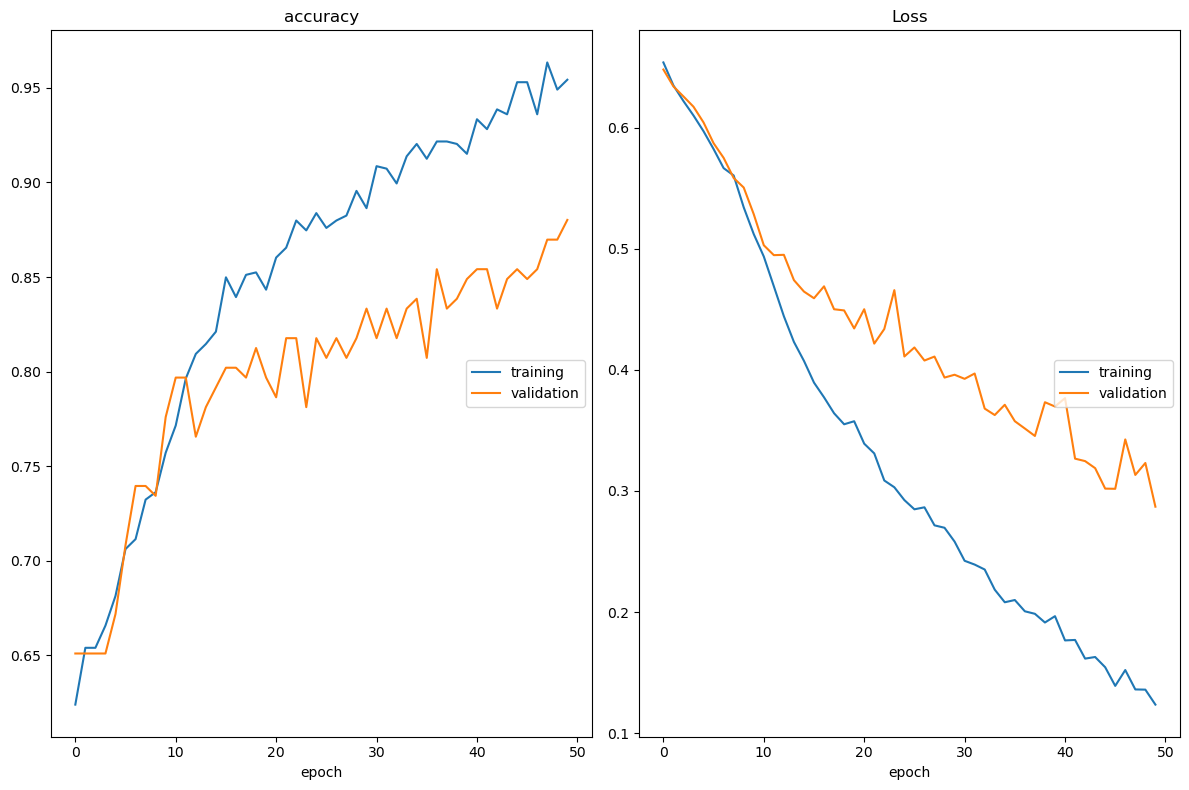

accuracy
	training         	 (min:    0.624, max:    0.963, cur:    0.954)
	validation       	 (min:    0.651, max:    0.880, cur:    0.880)
Loss
	training         	 (min:    0.124, max:    0.654, cur:    0.124)
	validation       	 (min:    0.287, max:    0.648, cur:    0.287)
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9573 - loss: 0.1182 - val_accuracy: 0.8802 - val_loss: 0.2870
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8876 - loss: 0.2671 

Test accuracy: 0.8802
Test loss: 0.2870


In [4]:
# your code here
# Split data into training and test sets
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from livelossplot import PlotLossesKeras


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create Sequential model
model = Sequential()

# Add layers
model.add(Dense(64, activation='relu', input_shape=(9,)))  # Input layer with 9 features
model.add(Dense(32, activation='relu'))                    # Hidden layer
model.add(Dense(16, activation='relu'))                    # Hidden layer
model.add(Dense(2, activation='softmax'))                  # Output layer with 2 classes

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_test, y_test),
                    callbacks=[PlotLossesKeras()])

# Evaluate model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nTest accuracy: {test_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")


# Save model with .keras extension (recommended format)
model.save('tic-tac-toe.keras')


## Step 3: Make Predictions

Now load your saved model and use it to make predictions on a few random rows in the test dataset. Check if the predictions are correct.

In [7]:
# Option 1: Convert y_test to numpy array first
y_test_array = y_test.to_numpy()  # or np.array(y_test)

# Select a few random samples from test set
np.random.seed(42)
sample_indices = np.random.choice(len(X_test), 5, replace=False)
X_samples = X_test[sample_indices]
y_true = y_test_array[sample_indices]

# Make predictions
predictions = model.predict(X_samples)
y_pred = np.argmax(predictions, axis=1)

# Print results
print("Predictions vs Actual Values:")
print("-" * 40)
for i in range(len(y_pred)):
    print(f"Sample {i+1}:")
    print(f"Predicted class: {y_pred[i]}")
    print(f"Actual class: {y_true[i]}")
    print(f"Correct? {'Yes' if y_pred[i] == y_true[i] else 'No'}")
    print("-" * 40)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Predictions vs Actual Values:
----------------------------------------
Sample 1:
Predicted class: 0
Actual class: 0
Correct? Yes
----------------------------------------
Sample 2:
Predicted class: 1
Actual class: 1
Correct? Yes
----------------------------------------
Sample 3:
Predicted class: 1
Actual class: 1
Correct? Yes
----------------------------------------
Sample 4:
Predicted class: 1
Actual class: 1
Correct? Yes
----------------------------------------
Sample 5:
Predicted class: 1
Actual class: 0
Correct? No
----------------------------------------


## Step 4: Improve Your Model

Did your model achieve low loss (<0.1) and high accuracy (>0.95)? If not, try to improve your model.

But how? There are so many things you can play with in Tensorflow and in the next challenge you'll learn about these things. But in this challenge, let's just do a few things to see if they will help.

* Add more layers to your model. If the data are complex you need more layers. But don't use more layers than you need. If adding more layers does not improve the model performance you don't need additional layers.
* Adjust the learning rate when you compile the model. This means you will create a custom `tf.keras.optimizers.Adam` instance where you specify the learning rate you want. Then pass the instance to `model.compile` as the optimizer.
    * `tf.keras.optimizers.Adam` [reference](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam).
    * Don't worry if you don't understand what the learning rate does. You'll learn about it in the next challenge.
* Adjust the number of epochs when you fit the training data to the model. Your model performance continues to improve as you train more epochs. But eventually it will reach the ceiling and the performance will stay the same.

/var/folders/h9/j3hcxdjj46zcp_9ysywqy39r0000gn/T/ipykernel_63072/3481944273.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'x': 1, 'o': -1, 'b': 0, True: 1, False: 0})
/Users/rakan/anaconda3/envs/ironhack/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,265 (12.75 KB)

 Trainable params: 3,265 (12.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6076 - loss: 0.6621 - val_accuracy: 0.6948 - val_loss: 0.6196
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6487 - loss: 0.6199 - val_accuracy: 0.7013 - val_loss: 0.5797
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6761 - loss: 0.5916 - val_accuracy: 0.7727 - val_loss: 0.5541
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6895 - loss: 0.5540 - val_accuracy: 0.7792 - val_loss: 0.5276
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7252 - loss: 0.5356 - val_accuracy: 0.7792 - val_loss: 0.5090
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7573 - loss: 0.5027 - val_accuracy: 0.7857 - val_loss: 0.4927
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7747 - loss: 0.4868 - val_accuracy: 0.7857 - val_loss: 0.4727
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7991 - loss: 0.4324 - val_accuracy: 0.8052 - val_loss:

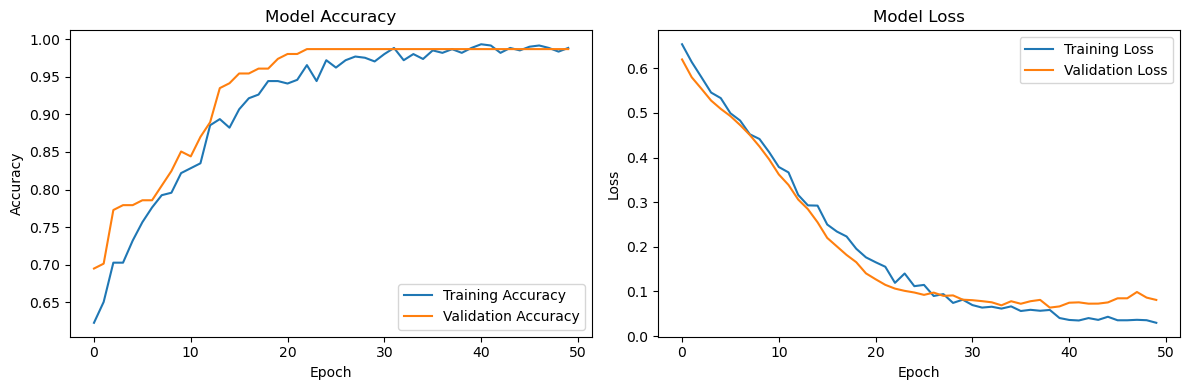

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step

Predictions vs Actual Values:
----------------------------------------
Sample 1:
Predicted class: 0
Actual class: 0
Correct? Yes
----------------------------------------
Sample 2:
Predicted class: 1
Actual class: 1
Correct? Yes
----------------------------------------
Sample 3:
Predicted class: 1
Actual class: 1
Correct? Yes
----------------------------------------
Sample 4:
Predicted class: 1
Actual class: 1
Correct? Yes
----------------------------------------
Sample 5:
Predicted class: 0
Actual class: 0
Correct? Yes
----------------------------------------


In [8]:
# your code here
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Step 1: Data Engineering
# Load the data
df = pd.read_csv('tic-tac-toe.csv')

# Convert categorical values to numeric
df = df.replace({'x': 1, 'o': -1, 'b': 0, True: 1, False: 0})

# Separate features and target
X = df.iloc[:, :-1].values  # All columns except the last one
y = df.iloc[:, -1].values   # Only the last column

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Build Neural Network
model = Sequential([
    # Input layer
    Dense(64, activation='relu', input_shape=(9,)),
    Dropout(0.2),  # Add dropout for regularization
    
    # Hidden layers
    Dense(32, activation='relu'),
    Dropout(0.2),
    
    Dense(16, activation='relu'),
    
    # Output layer
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model with custom learning rate
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=32,
                    validation_split=0.2,
                    verbose=1)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\nTest accuracy: {test_accuracy:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Save the model
model.save('tic-tac-toe.keras')

# Make predictions on test samples
np.random.seed(42)
sample_indices = np.random.choice(len(X_test), 5, replace=False)
X_samples = X_test[sample_indices]
y_true = y_test[sample_indices]

# Get predictions
predictions = model.predict(X_samples)
y_pred = (predictions > 0.5).astype(int)

# Print results
print("\nPredictions vs Actual Values:")
print("-" * 40)
for i in range(len(y_pred)):
    print(f"Sample {i+1}:")
    print(f"Predicted class: {y_pred[i][0]}")
    print(f"Actual class: {y_true[i]}")
    print(f"Correct? {'Yes' if y_pred[i][0] == y_true[i] else 'No'}")
    print("-" * 40)


**Which approach(es) did you find helpful to improve your model performance?**

In [9]:
# your answer here
# The layered architecture with dropout (reduced overfitting)
# Custom learning rate (improved model performance)
# Increased epochs (improved model performance)